In [0]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install fastai2

     |████████████████████████████████| 184kB 11.6MB/s 


In [0]:
!ls

drive  sample_data


In [0]:
%cd 'drive/My Drive/course-v4'

/content/drive/My Drive/course-v4


In [0]:
!pip install -r requirements.txt

     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.0MB 14.3MB/s 
     |████████████████████████████████| 40kB 7.3MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 2.3MB 56.8MB/s 


In [0]:
%cd 'nbs'

/content/drive/My Drive/course-v4/nbs


In [0]:
from utils import *

In [0]:
from fastai2.vision.widgets import *

In [0]:
key = '4b78f445f2f64402968de8241814e28d'

In [0]:
search_images_bing

<function utils.search_images_bing>

In [0]:
results = search_images_bing(key, 'surrealist painting')

In [0]:
ims = results.attrgot('content_url')
len(ims)

150

In [0]:
dest = 'images/surrealism.jpg'
download_url(ims[0],dest)

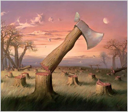

In [0]:
im = Image.open(dest)
im.to_thumb(128,128)

In [0]:
painting_types = 'surrealism', 'madhubani', 'mughal miniature', 'cubism'
path = Path('painting')

In [0]:
if not path.exists():
    path.mkdir()
    for o in painting_types:
        dest = (path/o)
        dest.mkdir(exist_ok = True)
        results = search_images_bing(key, f'{o} painting')
        download_images(dest, urls = results.attrgot('content_url'))

In [0]:
fns = get_image_files(path)
fns

(#598) [Path('painting/surrealism/00000001.jpg'),Path('painting/surrealism/00000006.jpg'),Path('painting/surrealism/00000002.jpg'),Path('painting/surrealism/00000005.jpg'),Path('painting/surrealism/00000010.jpg'),Path('painting/surrealism/00000011.JPG'),Path('painting/surrealism/00000000.jpg'),Path('painting/surrealism/00000003.jpeg'),Path('painting/surrealism/00000004.jpg'),Path('painting/surrealism/00000007.jpg')...]

In [0]:
failed = verify_images(fns)
failed

(#59) [Path('painting/surrealism/00000028.jpg'),Path('painting/surrealism/00000143.jpg'),Path('painting/madhubani/00000013.jpg'),Path('painting/madhubani/00000030.jpg'),Path('painting/madhubani/00000085.jpg'),Path('painting/madhubani/00000105.jpg'),Path('painting/madhubani/00000112.jpg'),Path('painting/mughal miniature/00000007.jpg'),Path('painting/mughal miniature/00000008.jpg'),Path('painting/mughal miniature/00000005.jpg')...]

In [0]:
failed.map(Path.unlink);

In [0]:
# Now we create datablock API

painting = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items = get_image_files,
                    splitter = RandomSplitter(valid_pct = 0.3, seed = 42),
                    get_y = parent_label,
                    item_tfms = Resize(128))

In [0]:
dls = painting.dataloaders(path)

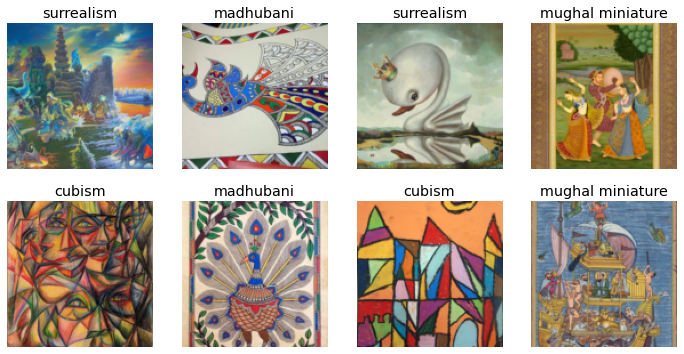

In [0]:
dls.valid.show_batch(max_n = 8, nrows = 2)

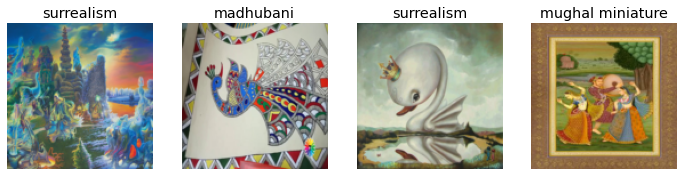

In [0]:
painting = painting.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = painting.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)

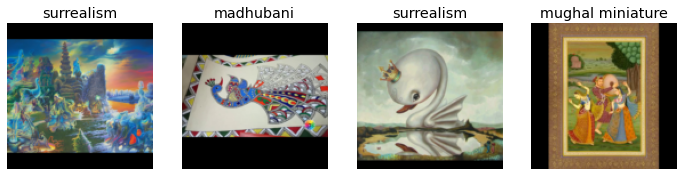

In [0]:
painting = painting.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = painting.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows=1)

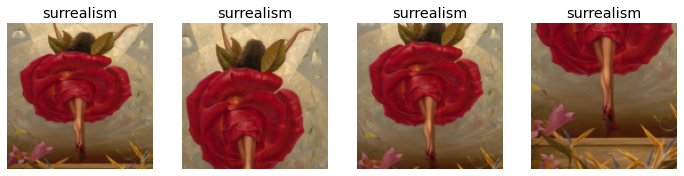

In [0]:
painting = painting.new(item_tfms = RandomResizedCrop(128,min_scale = 0.3))
dls = painting.dataloaders(path)
dls.train.get_idxs = lambda: Inf.ones
dls.train.show_batch(max_n = 4, nrows=1)

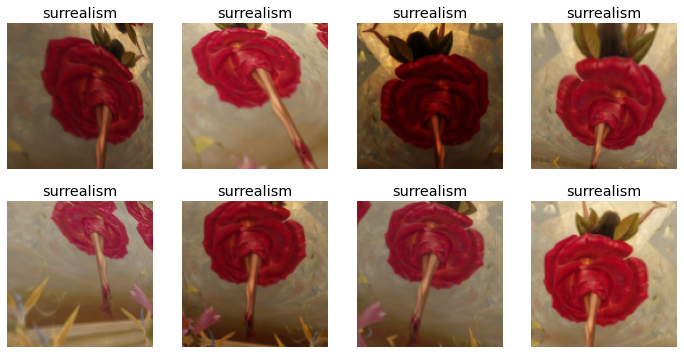

In [0]:
painting = painting.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = painting.dataloaders(path)
dls.train.get_idxs = lambda: Inf.ones
dls.train.show_batch(max_n = 8, nrows = 2)

In [0]:
painting = painting.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5),
                       batch_tfms = aug_transforms())

dls = painting.dataloaders(path)

In [0]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.019030,0.475401,0.180124,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.540066,0.253323,0.086957,00:14
1,0.382042,0.121250,0.043478,00:14
2,0.278726,0.104494,0.031056,00:14
3,0.237099,0.092458,0.031056,00:14


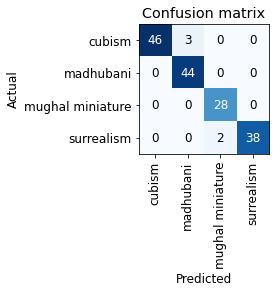

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

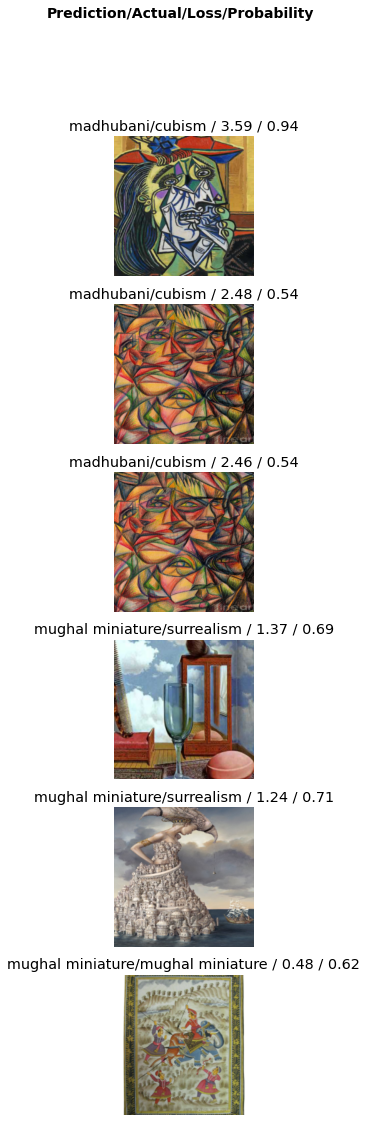

In [0]:
interp.plot_top_losses(6,nrows=6)

In [0]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [0]:
for ix in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(cleaner.fns[idx], path/cat)

In [0]:
# learn.save('stage-1')

In [0]:
# learn.load('stage-1')

In [0]:
# learn.unfreeze()

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=1.3182567499825382e-06)

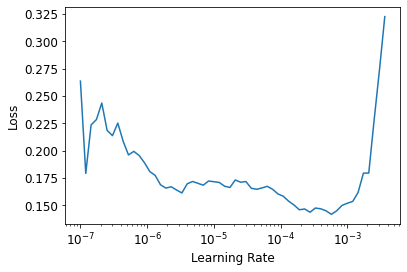

In [0]:
# learn.lr_find()

In [0]:
# learn.fit_one_cycle(2, lr_max = slice(4e-5, 2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.128507,0.628001,0.148594,00:24
1,0.124841,0.644956,0.148594,00:24


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
# learn.save('stage-2')

In [0]:
learn.export()

In [0]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [0]:
learn_inf = load_learner(path/'export.pkl')

In [0]:
learn_inf.predict('images/surrealism.jpg')

('surrealism',
 tensor(5),
 tensor([1.7468e-06, 5.5619e-09, 2.2278e-09, 1.3219e-05, 6.0785e-07, 9.9998e-01]))

In [0]:
learn_inf.dls.vocab

(#6) ['cubism','expressionism','madhubani','modernism','mughal miniature','surrealism']

In [0]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

TraitError: ignored

In [0]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [0]:
??display

In [0]:
??img

Object `img` not found.


In [0]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [0]:
pred, pred_idx, probs = learn_inf.predict(img)

In [0]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [0]:
btn_run = widgets.Button(description = 'Classify')
btn_run

In [0]:
def on_click_classify(change):
    img=PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction:{pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)

In [0]:
btn_upload = widgets.FileUpload()

In [0]:
VBox([widgets.Label('Select your painting!'),
     btn_upload, btn_run, out_pl, lbl_pred])

In [0]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix